In [30]:
import pandas as pd
import numpy as np
import seaborn as sns

In [72]:
from omegaconf import OmegaConf

import hydra

config = OmegaConf.load("conf/config.yaml")
current_dataset = config.mts_running_dataset
current_dataset

'settings_five'

In [73]:
detector_names = ['CBLOF', 'RobustPCA', 'COPOD', 'HBOS', 'LOF', 'PCC', 'AutoEncoder (AE)', 'DenoisingAutoEncoder (DAE)', 'Torsk', 'Random Black Forest (RR)']

In [74]:
combine_df = pd.read_csv('results_mts/combine_detectors/settings_five/merged_combine_detectors_results.csv')
combine_df

,Unnamed: 0,AUC_PR,VUS_PR,weight_AutoEncoder (AE),weight_CBLOF,weight_COPOD,weight_DenoisingAutoEncoder (DAE),weight_HBOS,weight_LOF,weight_PCC,weight_Random Black Forest (RR),weight_RobustPCA,weight_Torsk,dataset,filename,Model Selector,Combine Method,k
0,0,0.438331,0.472724,0.0,0.0,0.093909,0.0,0.394670,0.428934,0.0,0.0,0.000000,0.082487,settings_five,synthetic_batch_41.out,knn_16,average,4
1,1,0.451166,0.502075,0.0,0.0,0.093367,0.0,0.391213,0.428813,0.0,0.0,0.000000,0.086608,settings_five,synthetic_batch_462.out,knn_16,average,4
2,2,0.270936,0.528513,0.0,0.0,0.096581,0.0,0.407692,0.402137,0.0,0.0,0.000000,0.093590,settings_five,synthetic_batch_522.out,knn_16,average,4
3,3,0.464231,0.445722,0.0,0.0,0.097997,0.0,0.397103,0.404772,0.0,0.0,0.000000,0.100128,settings_five,synthetic_batch_101.out,knn_16,average,4
4,4,0.003034,0.017661,0.0,0.0,0.000000,0.0,0.430213,0.388936,0.0,0.0,0.091915,0.088936,settings_five,synthetic_batch_676.out,knn_16,average,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113899,113899,0.027456,0.061112,-0.0,-0.0,-0.000000,-0.0,-0.000000,0.254343,-0.0,-0.0,0.745657,-0.000000,settings_five,synthetic_batch_18.out,rocket_32,average,2
113900,113900,0.256937,0.344106,-0.0,-0.0,-0.000000,-0.0,-0.000000,0.099510,-0.0,-0.0,0.900490,-0.000000,settings_five,synthetic_batch_232.out,rocket_32,average,2
113901,113901,0.154507,0.202947,-0.0,-0.0,-0.000000,-0.0,-0.000000,0.069651,-0.0,-0.0,-0.000000,0.930349,settings_five,synthetic_batch_681.out,rocket_32,average,2
113902,113902,0.272950,0.235894,-0.0,-0.0,-0.000000,-0.0,-0.000000,0.070223,-0.0,-0.0,0.929777,-0.000000,settings_five,synthetic_batch_604.out,rocket_32,average,2


In [75]:
model_selection_cfgs = combine_df[['Model Selector', 'Combine Method', 'k']].value_counts().to_frame(name='Counts').reset_index()
model_selection_cfgs

,Model Selector,Combine Method,k,Counts
0,convnet_default_128,average,1,339
1,sit_linear_patch_128,vote,2,339
2,sit_linear_patch_16,vote,2,339
3,sit_linear_patch_16,vote,1,339
4,sit_linear_patch_16,average,4,339
...,...,...,...,...
331,resnet_default_16,vote,3,339
332,resnet_default_16,vote,2,339
333,resnet_default_16,vote,1,339
334,resnet_default_16,average,4,339


In [76]:
combine_df['filename'].unique()

array(['synthetic_batch_41.out', 'synthetic_batch_462.out',
       'synthetic_batch_522.out', 'synthetic_batch_101.out',
       'synthetic_batch_676.out', 'synthetic_batch_642.out',
       'synthetic_batch_450.out', 'synthetic_batch_325.out',
       'synthetic_batch_373.out', 'synthetic_batch_69.out',
       'synthetic_batch_697.out', 'synthetic_batch_229.out',
       'synthetic_batch_568.out', 'synthetic_batch_487.out',
       'synthetic_batch_40.out', 'synthetic_batch_289.out',
       'synthetic_batch_346.out', 'synthetic_batch_242.out',
       'synthetic_batch_609.out', 'synthetic_batch_90.out',
       'synthetic_batch_664.out', 'synthetic_batch_429.out',
       'synthetic_batch_493.out', 'synthetic_batch_476.out',
       'synthetic_batch_313.out', 'synthetic_batch_342.out',
       'synthetic_batch_625.out', 'synthetic_batch_91.out',
       'synthetic_batch_113.out', 'synthetic_batch_386.out',
       'synthetic_batch_199.out', 'synthetic_batch_179.out',
       'synthetic_batch_614.o

In [77]:
# auc_pf_dfs = pd.DataFrame()
# auc_pf_dfs['filename'] = df['filename'].unique()
# auc_pf_dfs['dataset'] = df['dataset'].unique()[0]
# auc_pf_dfs.set_index(['dataset', 'filename'], inplace=True)
auc_pf_dfs = []
for row in model_selection_cfgs.itertuples():
    # print(f'Model Selector: {row[1]}, Combine Method: {row[2]}, k: {row[3]} -> Counts: {row[4]}')
    single_df = combine_df[(combine_df['Model Selector'] == row[1]) & (combine_df['Combine Method'] == row[2]) & (combine_df['k'] == row[3])]
    # print(single_df.shape)
    single_df = single_df[['dataset', 'filename', 'AUC_PR', 'VUS_PR']]
    # single_df.set_index(['dataset', 'filename'], inplace=True)
    single_df['Model'] = f'{row[1]}_{row[2]}_{row[3]}'
    # single_df.rename(columns={'AUC_PR': f'{row[1]}_{row[2]}_{row[3]}'}, inplace=True)
    
    auc_pf_dfs.append(single_df)
auc_pf_dfs = pd.concat(auc_pf_dfs, axis=0, ignore_index=True)
# auc_pf_dfs.reset_index(inplace=True)
auc_pf_dfs.shape
# sns.boxplot(data=single_df, x='Dataset', y='AUC_PR', hue='Detector')

(113904, 5)

In [78]:
auc_pf_dfs.head()

,dataset,filename,AUC_PR,VUS_PR,Model
0,settings_five,synthetic_batch_41.out,0.273848,0.348588,convnet_default_128_average_1
1,settings_five,synthetic_batch_462.out,0.370530,0.436027,convnet_default_128_average_1
2,settings_five,synthetic_batch_522.out,0.269008,0.428280,convnet_default_128_average_1
3,settings_five,synthetic_batch_101.out,0.682163,0.740540,convnet_default_128_average_1
4,settings_five,synthetic_batch_676.out,0.002593,0.019009,convnet_default_128_average_1


In [79]:
combined_detector_methods = auc_pf_dfs['Model'].unique().tolist()
print('Combined detector methods:', combined_detector_methods[:10])

Combined detector methods: ['convnet_default_128_average_1', 'sit_linear_patch_128_vote_2', 'sit_linear_patch_16_vote_2', 'sit_linear_patch_16_vote_1', 'sit_linear_patch_16_average_4', 'sit_linear_patch_16_average_3', 'sit_linear_patch_16_average_2', 'sit_linear_patch_16_average_1', 'sit_linear_patch_128_vote_4', 'sit_linear_patch_128_vote_3']


In [201]:
# Replace this value with "AUC_PR" or "VUS_PR" to obtain the corresponding results
measure_name = 'VUS_PR'

# ['INTERPRETABILITY_HIT_2_SCORE', 'INTERPRETABILITY_LOG_SCORE']

# Uncomment this command and all plt.savefig(...) commands to save the generated figures
# figure_path = 'dummy/path/{}.svg'
df = pd.read_csv(f'results_mts/merged_scores/settings_five/current_accuracy_{measure_name}.csv')
score_columns = [c for c in df.columns if c.endswith('_score')]
new_columns = {c: c[:-6] for c in score_columns}
# print(new_columns)
# print(score_columns)
df.rename(new_columns, axis=1, inplace=True)
# df.columns = df.columns.str[:-5]
print(df.columns)
if 'Unnamed: 0' in df.columns:
    df = df.drop(labels='Unnamed: 0', axis=1)
# base_df = base_df[['dataset', 'filename', 'Oracle', 'Avg Ens']]
# df = pd.merge(df, auc_pf_dfs, on=['dataset', 'filename'], how='left')
df.shape
# df = pd.merge(df, df_vote, on=['dataset', 'filename'], how='left')

Index(['dataset', 'filename', 'label', 'ada_boost_16_class', 'ada_boost_16',
       'ada_boost_32_class', 'ada_boost_32', 'ada_boost_64_class',
       'ada_boost_64', 'ada_boost_128_class',
       ...
       'CBLOF', 'RobustPCA', 'COPOD', 'HBOS', 'LOF', 'PCC', 'Torsk',
       'Random Black Forest (RR)', 'AutoEncoder (AE)',
       'DenoisingAutoEncoder (DAE)'],
      dtype='object', length=175)


(339, 175)

In [202]:
original_model_selectors_dfs = []
for key, original_c in new_columns.items():
    # print(original_c)
    selected_df = df[['dataset', 'filename', original_c]]
    selected_df.rename(columns={original_c: measure_name}, inplace=True)
    selected_df['Model'] = original_c
    
    original_model_selectors_dfs.append(selected_df)
for detector in detector_names:
    selected_df = df[['dataset', 'filename', detector]]
    selected_df.rename(columns={detector: measure_name}, inplace=True)
    selected_df['Model'] = detector
    original_model_selectors_dfs.append(selected_df)
base_lines = ['Oracle', 'Avg Ens']
for detector in base_lines:
    selected_df = df[['dataset', 'filename', detector]]
    selected_df.rename(columns={detector: measure_name}, inplace=True)
    selected_df['Model'] = detector
    original_model_selectors_dfs.append(selected_df)
original_model_selectors_dfs = pd.concat(original_model_selectors_dfs, axis=0, ignore_index=True)
original_model_selectors_dfs
    

/var/folders/5j/s9hphkqj409f3hqysls2hfzh0000gn/T/ipykernel_93511/1676186130.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df.rename(columns={original_c: measure_name}, inplace=True)
/var/folders/5j/s9hphkqj409f3hqysls2hfzh0000gn/T/ipykernel_93511/1676186130.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['Model'] = original_c
/var/folders/5j/s9hphkqj409f3hqysls2hfzh0000gn/T/ipykernel_93511/1676186130.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation

,dataset,filename,VUS_PR,Model
0,settings_five,synthetic_batch_1.out,0.538688,ada_boost_16
1,settings_five,synthetic_batch_10.out,0.599976,ada_boost_16
2,settings_five,synthetic_batch_100.out,0.243145,ada_boost_16
3,settings_five,synthetic_batch_101.out,0.740540,ada_boost_16
4,settings_five,synthetic_batch_103.out,0.657116,ada_boost_16
...,...,...,...,...
31183,settings_five,synthetic_batch_85.out,0.671409,Avg Ens
31184,settings_five,synthetic_batch_90.out,0.547750,Avg Ens
31185,settings_five,synthetic_batch_91.out,0.214423,Avg Ens
31186,settings_five,synthetic_batch_98.out,0.572087,Avg Ens


In [203]:
combined_df = pd.concat([original_model_selectors_dfs, auc_pf_dfs], axis=0, ignore_index=True)
assert 'Oracle' in combined_df['Model'].unique()
assert 'Avg Ens' in combined_df['Model'].unique()
for detector in detector_names:
    assert detector in combined_df['Model'].unique()
combined_df.shape

(145092, 5)

In [204]:
print(f'Detector names',detector_names)
print('Base lines:', base_lines)
model_selectors = [c for c in combined_df['Model'].unique() if c not in base_lines and c not in detector_names]
print('Number of model selectors:', len(model_selectors))

model_selectors_v1 = [c for c in model_selectors if ('vote' not in c and 'average' not in c)]
print('Number of model selectors v1:', len(model_selectors_v1))
model_selectors_v1_in_v2 = [c for c in model_selectors if c.endswith('vote_1')]
print('Number of model selectors v1 in v2:', len(model_selectors_v1_in_v2))
model_selectors_v2_not_v1 = [c for c in model_selectors if c not in model_selectors_v1 and c not in model_selectors_v1_in_v2]
print('Number of model selectors v2 not in v1:', len(model_selectors_v2_not_v1))

Detector names ['CBLOF', 'RobustPCA', 'COPOD', 'HBOS', 'LOF', 'PCC', 'AutoEncoder (AE)', 'DenoisingAutoEncoder (DAE)', 'Torsk', 'Random Black Forest (RR)']
Base lines: ['Oracle', 'Avg Ens']
Number of model selectors: 416
Number of model selectors v1: 80
Number of model selectors v1 in v2: 42
Number of model selectors v2 not in v1: 294


In [205]:
# Set up methods' colors
methods_colors = {
    "oracle": "#FFFFFF",
    "avg_ens": "#FF7133",
    "best_ms": "#33D4FF",
    "best_ms_combine": "#81E759",
    "detectors": "#CCCCCC",
    "feature_based": "#91AAC2",
    "sit": "#FFB522",
    "conv": "#4494FF",
    "conv_2": "#0048FF",
    "rocket": "#EA7DFF",
    "best_ad_train": "#228B22",
    "worst_ad_test": "#8B0000",
}

# methods_conv = [
#     'inception_time_{}',
#     'convnet_{}',
#     'resnet_{}',]
methods_conv = [
    
    'inception_time_{}',
    'convnet_{}',
    'resnet_{}',
    'inception_time_default_{}',
    'convnet_default_{}',
    'resnet_default_{}',]
methods_conv_combine = [
    'inception_time_default_{}_{}_{}',
    'convnet_default_{}_{}_{}',
    'resnet_default_{}_{}_{}',]

methods_sit = [
    'sit_conv_patch_{}',
    'sit_linear_patch_{}',
    'sit_stem_original_{}',
    'sit_stem_relu_{}',]
methods_sit_combine = [
    'sit_conv_patch_{}_{}_{}',
    'sit_linear_patch_{}_{}_{}',
    'sit_stem_original_{}_{}_{}',
    'sit_stem_relu_{}_{}_{}',]

methods_ts = ['rocket_{}']
methods_ts_combine = ['rocket_{}_{}_{}']

methods_feature = [
    'ada_boost_{}',
    'knn_{}',
    'decision_tree_{}',
    'random_forest_{}',
    'mlp_{}',
    'bayes_{}',
    'qda_{}',
    'svc_linear_{}']

methods_feature_combine = [
    'ada_boost_{}_{}_{}',
    'knn_{}_{}_{}',
    'decision_tree_{}_{}_{}',
    'random_forest_{}_{}_{}',
    'mlp_{}_{}_{}',
    'bayes_{}_{}_{}',
    'qda_{}_{}_{}',
    'svc_linear_{}_{}_{}']

# old_methods = ['IFOREST', 'LOF', 'MP', 'NORMA', 'IFOREST1', 'HBOS', 'OCSVM','PCA', 'AE', 'CNN', 'LSTM', 'POLY']

# old_methods = ['CBLOF', 'RobustPCA', 'COPOD', 'HBOS', 'LOF', 'PCC', 'AutoEncoder (AE)', 'DenoisingAutoEncoder (DAE)', 'Torsk', 'Random Black Forest (RR)']
# 
# Base_methods = ['Avg Ens','Oracle']
# 
# # all_length = [16, 32, 64, 128, 256, 512, 768, 1024]
# all_length = [16, 32, 64, 128, 256]
# # all_length = config.supported_window_sizes
# 
# all_methods_ens = [meth.format(length) for meth in methods_conv for length in all_length]
# all_methods_ens += [meth.format(length) for meth in methods_sit for length in all_length]
# all_methods_ens += [meth.format(length) for meth in methods_ts for length in all_length]
# all_methods_ens += [meth.format(length) for meth in methods_feature for length in all_length]
# all_methods_ens += combined_detector_methods
# 
# # Keep only the methods that exist in the results you read
# all_methods = old_methods + Base_methods + all_methods_ens
# all_methods = [x for x in all_methods if x in df.columns]
# 
# # Create a list of all different classes of methods
# split = [x.rsplit('_', 1)[0] for x in all_methods]
# used = set()
# all_methods_class = [x for x in split if x not in used and (used.add(x) or True)]

In [206]:
template_names = {
    'auc_pr_vote_4': 'Vote-4',
    'auc_pr_average_4': 'Avg-4',
    'inception_time_{}': 'InceptTime-{}',
    'inception_time_default_{}': 'InceptTime-{}',
    'inception_time_{}_{}_{}': 'InceptTime-{}-{}-{}',
    'inception_time_default_{}_{}_{}': 'InceptTime-{}-{}-{}',
    'convnet_{}': 'ConvNet-{}',
    'convnet_default_{}': 'ConvNet-{}',
    'convnet_default_{}_{}_{}': 'ConvNet-{}-{}-{}',
    # 'convnet_default_average_{}': 'ConvNet-Avg-{}',
    'resnet_{}': 'ResNet-{}',
    'resnet_default_{}': 'ResNet-{}',
    'resnet_default_{}_{}_{}': 'ResNet-{}-{}-{}',
    # 'resnet_default_avg_{}': 'ResNet-Avg-{}',
    'sit_conv_patch_{}': 'SiT-conv-patch-{}',
    'sit_linear_patch_{}': 'SiT-linear-patch-{}',
    'sit_stem_original_{}': 'SiT-stem-original-{}',
    'sit_stem_relu_{}': 'SiT-stem-ReLU-{}',
    
    'sit_conv_patch_{}_{}_{}': 'SiT-conv-patch-{}-{}-{}',
    'sit_linear_patch_{}_{}_{}': 'SiT-linear-patch-{}-{}-{}',
    'sit_stem_original_{}_{}_{}': 'SiT-stem-original-{}-{}-{}',
    'sit_stem_relu_{}_{}_{}': 'SiT-stem-ReLU-{}-{}-{}',
    
    'rocket_{}': 'Rocket-{}',
    'rocket_{}_{}_{}': 'Rocket-{}-{}-{}',
    
    'ada_boost_{}': 'AdaBoost-{}',
    'knn_{}': 'kNN-{}',
    'decision_tree_{}': 'DecisionTree-{}',
    'random_forest_{}': 'RandomForest-{}',
    'mlp_{}': 'MLP-{}',
    'bayes_{}': 'Bayes-{}',
    'qda_{}': 'QDA-{}',
    'svc_linear_{}': 'SVC-{}',
    
    'ada_boost_{}_{}_{}': 'AdaBoost-{}-{}-{}',
    'knn_{}_{}_{}': 'kNN-{}-{}-{}',
    'decision_tree_{}_{}_{}': 'DecisionTree-{}-{}-{}',
    'random_forest_{}_{}_{}': 'RandomForest-{}-{}-{}',
    'mlp_{}_{}_{}': 'MLP-{}-{}-{}',
    'bayes_{}_{}_{}': 'Bayes-{}-{}-{}',
    'qda_{}_{}_{}': 'QDA-{}-{}-{}',
    'svc_linear_{}_{}_{}': 'SVC-{}-{}-{}',
    
    'IFOREST': 'IForest',
    'LOF': 'LOF',
    'MP': 'MP',
    'NORMA': 'NormA',
    'IFOREST1': 'IForest1',
    
    'CBLOF': 'CBLOF',
    'COF': 'COF',
    'RobustPCA': 'RobustPCA',
    'COPOD': 'COPOD',
    'PCC': 'PCC',
    'HBOS': 'HBOS',
    'OCSVM': 'OCSVM',
    'PCA': 'PCA',
    'Torsk': 'TORSK',
    # 'AE': 'AE',
    'AutoEncoder (AE)': 'AE',
    'DenoisingAutoEncoder (DAE)': 'DAE',
    'Random Black Forest (RR)': 'RBF',
    'CNN': 'CNN',
    'LSTM': 'LSTM',
    'POLY': 'POLY',
    'Avg Ens': 'Avg Ens',
    'Oracle': 'Oracle',
    'VUS_PR': 'VUS-PR',
    'label': 'Label',
    'best_ms': 'Best MS v1 \n {}',
    'best_ms_v2': 'Best MS v2 \n {}',
    'convnet': 'ConvNet',
    'resnet': 'ResNet',
    'rocket': 'Rocket',
    'knn': 'kNN',
    'sit_stem': 'SiT-stem',
    'sit': 'SiT',
    'feature_based': 'Feature-based',
    'AUC_PR': 'AUC-PR',
    'AUC_ROC': 'AUC-ROC',
    'VUS_ROC': 'VUS_ROC',
    'INTERPRETABILITY_LOG_SCORE':'INTERPRETABILITY_LOG_SCORE',
    'INTERPRETABILITY_HIT_2_SCORE': 'INTERPRETABILITY_HIT_2_SCORE'
}

all_length = [16, 32, 64, 128, 256]
final_names = {}
for length in all_length:
    for key, value in template_names.items():
        if '{}' in key and '{}_{}_{}' not in key:
            new_key = key.format(length)
            new_value = value.format(length)
            final_names[new_key] = new_value
        elif '{}_{}_{}' in key:
            for method in ['vote', 'average']:
                for k in [1,2,3,4]:
                    new_key = key.format(length, method, k)
                    new_value = value.format(length, method, k)
                    final_names[new_key] = new_value
        else:
            final_names[key] = value
print(final_names)

{'auc_pr_vote_4': 'Vote-4', 'auc_pr_average_4': 'Avg-4', 'inception_time_16': 'InceptTime-16', 'inception_time_default_16': 'InceptTime-16', 'inception_time_16_vote_1': 'InceptTime-16-vote-1', 'inception_time_16_vote_2': 'InceptTime-16-vote-2', 'inception_time_16_vote_3': 'InceptTime-16-vote-3', 'inception_time_16_vote_4': 'InceptTime-16-vote-4', 'inception_time_16_average_1': 'InceptTime-16-average-1', 'inception_time_16_average_2': 'InceptTime-16-average-2', 'inception_time_16_average_3': 'InceptTime-16-average-3', 'inception_time_16_average_4': 'InceptTime-16-average-4', 'inception_time_default_16_vote_1': 'InceptTime-16-vote-1', 'inception_time_default_16_vote_2': 'InceptTime-16-vote-2', 'inception_time_default_16_vote_3': 'InceptTime-16-vote-3', 'inception_time_default_16_vote_4': 'InceptTime-16-vote-4', 'inception_time_default_16_average_1': 'InceptTime-16-average-1', 'inception_time_default_16_average_2': 'InceptTime-16-average-2', 'inception_time_default_16_average_3': 'InceptT

In [207]:
final_names['best_ms_v2']

'Best MS v2 \n {}'

In [208]:
combined_df['Model'].nunique()

428

Index(['dataset', 'filename', 'VUS_PR', 'Model', 'AUC_PR'], dtype='object')
Best MS v1 indices: svc_linear_32
selected_best_ms_combine indices: [279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293]
best_ms_v2 index: convnet_default_16_vote_4
names of selected best combine methods: ['resnet_default_64_vote_4', 'convnet_default_16_vote_3', 'inception_time_default_64_vote_4', 'sit_stem_relu_16_vote_4', 'inception_time_default_256_average_3', 'sit_stem_relu_32_average_3', 'convnet_default_16_average_4', 'knn_32_average_4', 'inception_time_default_32_vote_4', 'inception_time_default_128_vote_4', 'convnet_default_32_vote_4', 'sit_stem_relu_32_average_4', 'resnet_default_16_vote_4', 'knn_16_average_4', 'convnet_default_16_vote_4']
Best MS v2 name: convnet_default_16_vote_4
Best Model Selector (MS) is: SVC-32
Best Model Selector (MS) is: ConvNet-16-vote-4
Best Combined Detector Method is: ['ResNet-64-vote-4', 'ConvNet-16-vote-3', 'InceptTime-64-vote-4', 'SiT-stem-ReLU-16-

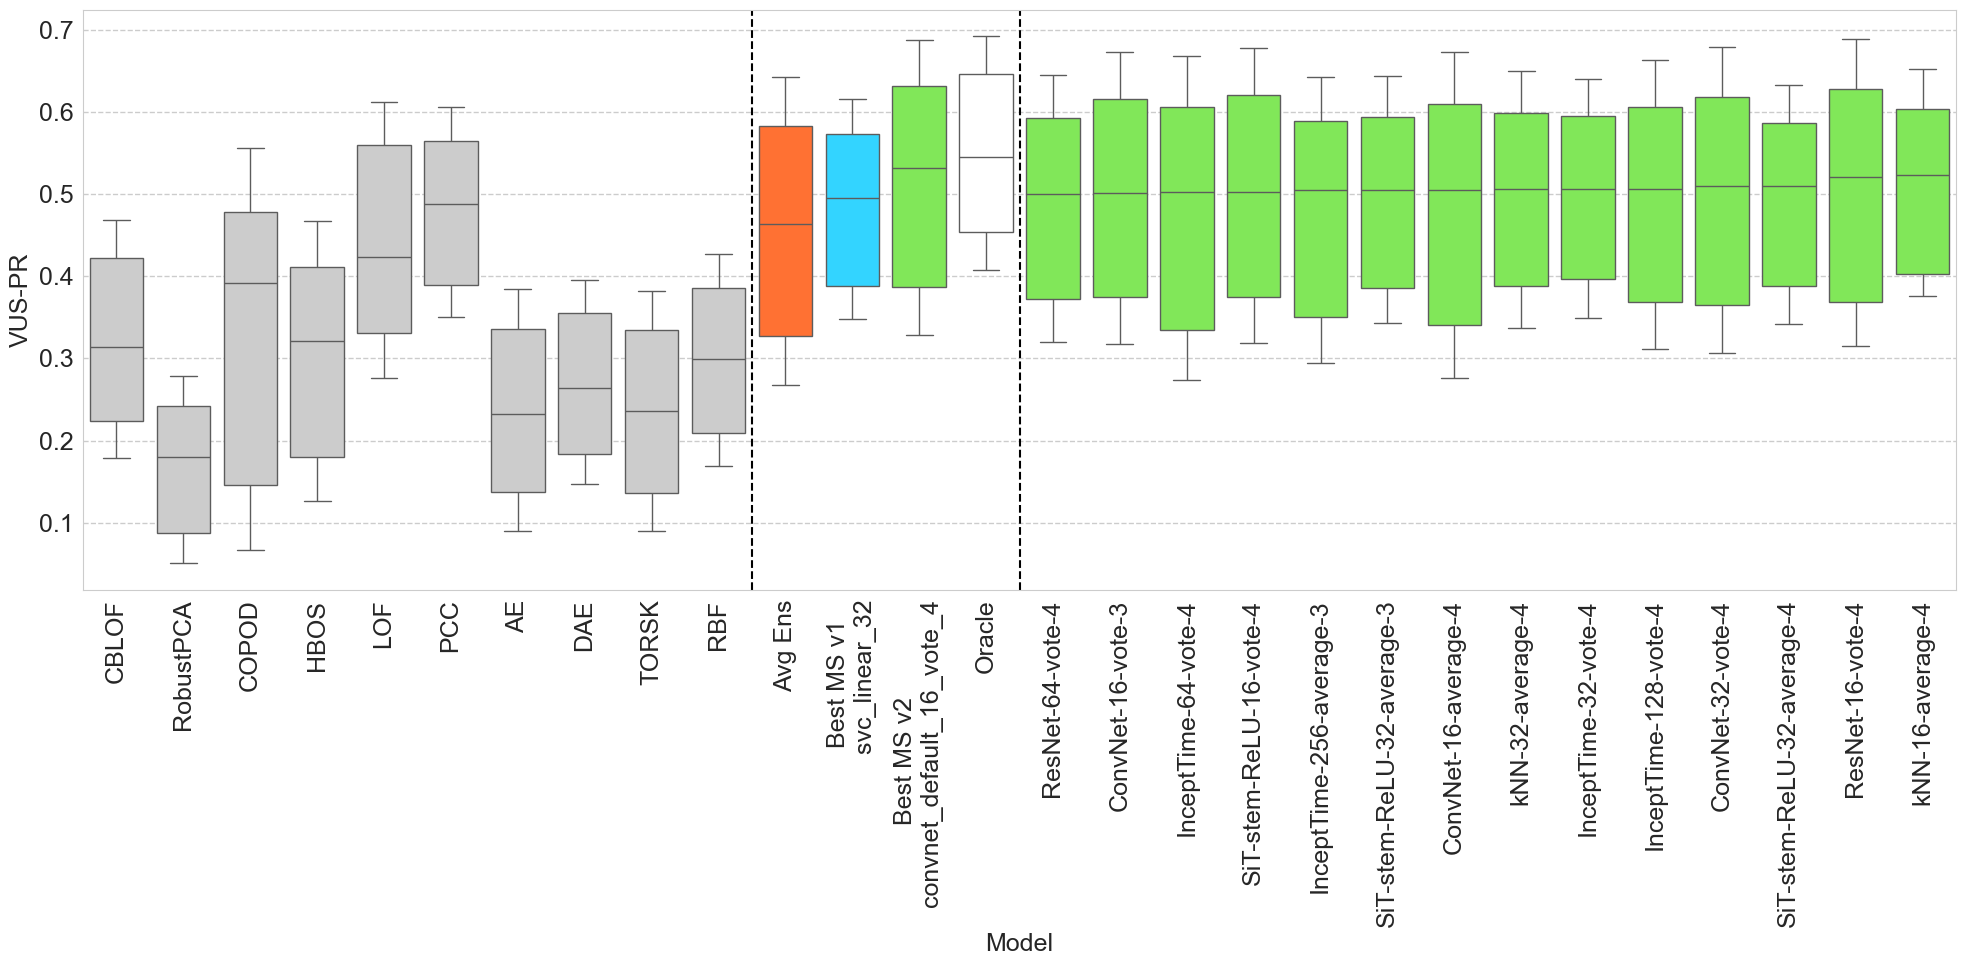

In [209]:
from matplotlib import pyplot as plt


def plot_result_boxplot_dataset(combined_df):
    print(combined_df.columns)
    plt.rcParams.update({'font.size': 18})
    plt.figure(figsize=(20, 10))
    plt.grid(color='k', linestyle='--', linewidth=1, alpha=0.2)
    
    
    # model_selectors_rest = [c for c in df.columns if c not in model_selectors and c not in ['dataset', 'filename', measure_name]]    
    # Distinguish the models within the final df
    # ms_models = [x for x in df['Model'].unique() if any([y in x for y in model_selectors])]
    # msad_models = [x for x in ms_models if x.endswith('vote_1')]
    # msade_models = [x for x in ms_models if x not in msad_models]
    # rest_models = [x for x in df['Model'].unique() if not any([y in x for y in model_selectors])]

    
    # Calculate the mean performance for each Model Selector (MS)
    # method_means = df[[x for x in all_methods_ens if x in df.columns]].mean()
    method_meansv1 = combined_df[combined_df['Model'].isin(model_selectors_v1)].groupby('Model')[measure_name].median().sort_values()
    best_ms = method_meansv1.idxmax() # Best MS may differ since results are may slightly vary (although distributions are solid)
    print(f'Best MS v1 indices:', best_ms)
    # method_means_combine = combined_df.groupby('Model')[measure_name].mean()
    # print('Mean combine shape', method_means_combine.shape)
    top_N = 15
    method_means_msadv2 = combined_df[combined_df['Model'].isin(model_selectors_v2_not_v1)].groupby('Model')[measure_name].median().sort_values()
    selected_best_ms_combine = np.argpartition(method_means_msadv2.values, -top_N)[-top_N:].tolist()
    best_ms_v2 = method_means_msadv2.index[selected_best_ms_combine[-1]]
    print('selected_best_ms_combine indices:', selected_best_ms_combine)
    print('best_ms_v2 index:', best_ms_v2)
    selected_best_ms_combine_raw_names = method_means_msadv2.index[selected_best_ms_combine].tolist()
    print(f'names of selected best combine methods:', selected_best_ms_combine_raw_names )
    print(f'Best MS v2 name:', best_ms_v2)
    
    # best_ms_combine = method_means_combine.idxmax()
#     best_ms = 'resnet_1024' # Best model selector at the time publishing of our paper 
    print(f"Best Model Selector (MS) is: {final_names[best_ms]}")
    print(f"Best Model Selector (MS) is: {final_names[best_ms_v2]}")
    selected_best_ms_combine_fix_names = [final_names[f] for f in selected_best_ms_combine_raw_names]
    print(f"Best Combined Detector Method is: {selected_best_ms_combine_fix_names}")
    
    # old_method_order = ['OCSVM','POLY','LSTM','CNN','HBOS','PCA','IFOREST','AE','LOF','IFOREST1','MP','NORMA']
    # old_method_order = ['CBLOF','RobustPCA','COPOD','HBOS','LOF','PCC','AutoEncoder (AE)','DenoisingAutoEncoder (DAE)','Torsk', 'Random Black Forest (RR)']
    my_pal = {method: methods_colors["detectors"] for method in detector_names}
    combine_pal = {method: methods_colors["best_ms_combine"] for method in model_selectors}
    my_pal = {**my_pal, **combine_pal, **{"Avg Ens": methods_colors["avg_ens"], best_ms: methods_colors["best_ms"], 'Oracle': methods_colors["oracle"] }}
    
    tmp_methods = (detector_names + ['Avg Ens', best_ms,  best_ms_v2, 'Oracle'] + 
                   selected_best_ms_combine_raw_names[:-1])  # Exclude best_ms_v2 since it's already added
    bplot = sns.boxplot(data=combined_df, y=measure_name, x='Model',palette=my_pal, showfliers = False, saturation=1, whis=0.241289844, hue="Model", order=tmp_methods)
    
    xticks_labels = []
    for x in tmp_methods:
        if x != best_ms and x!= best_ms_v2:
            xticks_labels.append(final_names[x])
        elif x == best_ms:
            xticks_labels.append(final_names['best_ms'].format(best_ms))
        else:
            xticks_labels.append(final_names['best_ms_v2'].format(best_ms_v2))
    
    plt.xticks(list(range(len(xticks_labels))), xticks_labels, rotation=90)
    plt.ylabel(final_names[measure_name])

    plt.axvline(9.5, color='black', linestyle='--')
    plt.axvline(13.5, color='black', linestyle='--')
    plt.tight_layout()
#     plt.savefig(figure_path.format('1_intro_fig_1'), transparent=True)
    plt.show()
    plt.close()
    
plot_result_boxplot_dataset(combined_df)

/var/folders/5j/s9hphkqj409f3hqysls2hfzh0000gn/T/ipykernel_93511/3386472803.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.axes.set_xticklabels(new_xticks_labels)


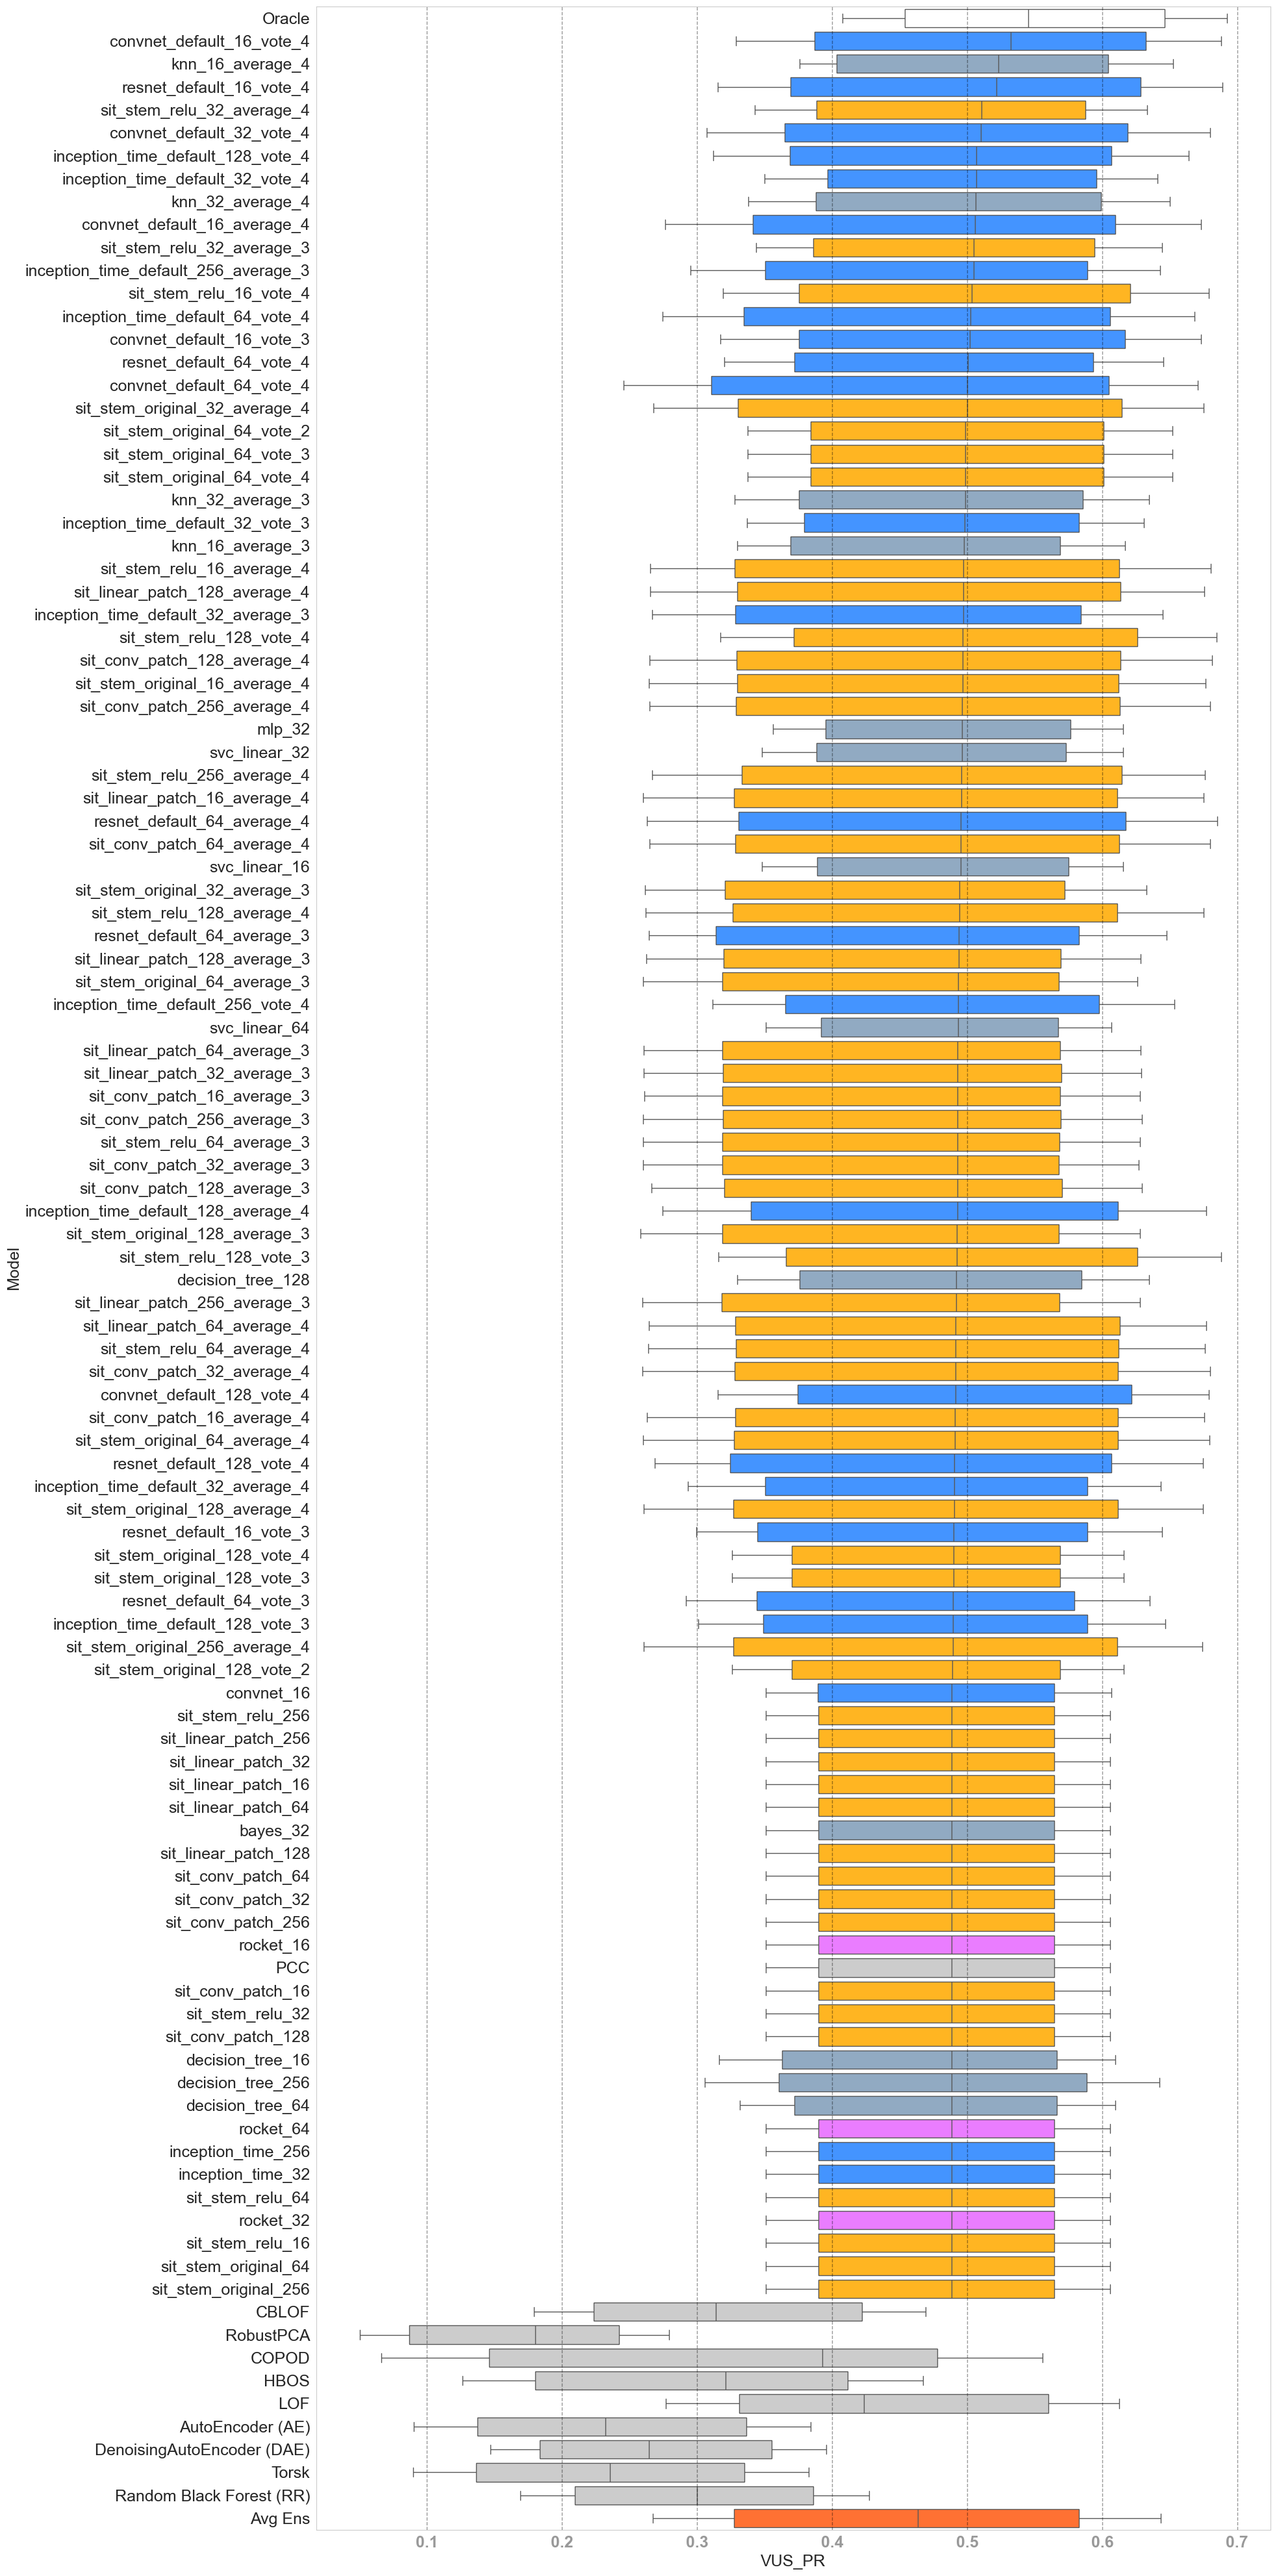

In [210]:
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(20, 40))
plt.grid(color='k', linestyle='--', linewidth=1, alpha=0.4)

order = list(combined_df.groupby('Model')[measure_name].median().sort_values().index)[::-1]
# print(order)
# order = list(df[all_methods].median().sort_values().index)[:20]

my_pal = {method: methods_colors["detectors"] for method in detector_names}
for family, color in zip([methods_conv, methods_sit, methods_ts, methods_feature],
                         [methods_colors["conv"], methods_colors["sit"], methods_colors["rocket"], methods_colors["feature_based"]]):
    for length in all_length:
        my_pal_tmp = {method.format(length):color for method in family}
        my_pal = {**my_pal, **my_pal_tmp}
        
# for family, color in zip([methods_conv_combine, methods_sit_combine, methods_ts_combine, methods_feature_combine],
#                          [methods_colors['best_ms_combine'], methods_colors['best_ms_combine'] ,methods_colors['best_ms_combine'] ,methods_colors['best_ms_combine']]):
for family, color in zip([methods_conv_combine, methods_sit_combine, methods_ts_combine, methods_feature_combine],
                         [methods_colors["conv"], methods_colors["sit"], methods_colors["rocket"], methods_colors["feature_based"]]):
    for length in all_length:
        for strategy in ['vote', 'average']:
            for k in [1,2,3,4]:
                my_pal_tmp = {method.format(length, strategy, k):color for method in family}
                my_pal = {**my_pal, **my_pal_tmp}
my_pal = {**my_pal,**{"Avg Ens": methods_colors["avg_ens"], 'Oracle': methods_colors["oracle"]}}

# Crete boxplot and stripplot
showed_model_selectors = order[:100]
for detector in detector_names:
    if detector not in showed_model_selectors:
        showed_model_selectors.append(detector)
if 'Avg Ens' not in showed_model_selectors:
    showed_model_selectors.append('Avg Ens')
g = sns.boxplot(data=combined_df,x=measure_name, y='Model', hue='Model', palette=my_pal, order=showed_model_selectors, saturation=1, whis=0.241289844, showfliers=False) # 1std = 0.241289844, 2std = 0.982579689
g.set_axisbelow(False)

for tick_label in g.axes.get_xticklabels():
    tick_label.set_weight('bold')
    if 'sit_' in tick_label.get_text():
        tick_label.set_color(methods_colors["sit"])
    elif ('convnet_' in tick_label.get_text()) or ('resnet_' in tick_label.get_text()) or ('inception_' in tick_label.get_text()):
        tick_label.set_color(methods_colors["conv"])
    elif 'rocket_' in tick_label.get_text():
        tick_label.set_color(methods_colors["rocket"])
    elif ('Oracle' in tick_label.get_text()):
        tick_label.set_color("black")
    elif ('Avg Ens' in tick_label.get_text()):
        tick_label.set_color(methods_colors["avg_ens"])
    elif '_'not  in tick_label.get_text():
        tick_label.set_color("#999999")
    else:
        tick_label.set_color(methods_colors["feature_based"])

# Change xtick labels to camera-ready names
new_xticks_labels = []
for i, tick_label in enumerate(g.axes.get_xticklabels()):
    method_name = tick_label.get_text()
    if method_name in final_names:
        tick_label.set_text(final_names[method_name])
    else:
        tick_label.set_text(method_name)
    new_xticks_labels.append(tick_label)
g.axes.set_xticklabels(new_xticks_labels)

# plt.xticks(rotation=90)
# plt.yticks(rotation=90)
# plt.ylabel(final_names[measure_name])

plt.tight_layout()
# plt.savefig(figure_path.format('5_overall_results_full_1'))
plt.show()
plt.close()

In [21]:
print(set([f[:-3] for f in df['Model Selector'].unique()]))

{'inception_time_default', 'sit_stem_original', 'inception_time_default_', 'sit_linear_patch', 'sit_stem_original_', 'sit_stem_relu', 'convnet_default_', 'resnet_default_', 'convnet_default', 'sit_stem_relu_', 'sit_conv_patch', 'sit_linear_patch_', 'sit_conv_patch_', 'resnet_default'}


In [7]:
2712/8

339.0

In [14]:
5*(1+3+4)

40

KeyboardInterrupt: 

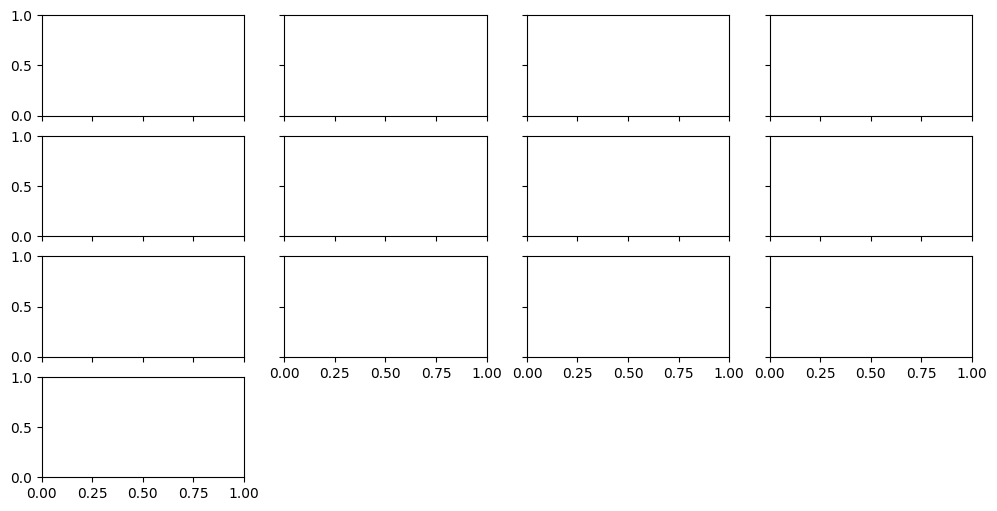

In [24]:
sns.boxplot(data=df[tmp_methods],